In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np
%matplotlib inline

#reading in the data
file_path = 'H:/Documents/Paris/Paris/Q1 airbnb_data Paris/calendar/calendar.csv'
#file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/Paris/Paris/Q1 airbnb_data Paris/calendar/calendar.csv'
data = pd.read_csv(file_path)

In [2]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data['adjusted_price'] = data['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)
data['date']=pd.to_datetime(data['date'])
data['weekday'] = pd.Series(data.date).dt.dayofweek
data.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekday
0,5396,2023-03-14,f,123.0,123.0,1.0,1125.0,1
1,5396,2023-03-15,f,123.0,123.0,1.0,1125.0,2
2,5396,2023-03-16,f,124.0,124.0,1.0,1125.0,3
3,5396,2023-03-17,f,124.0,124.0,1.0,1125.0,4
4,5396,2023-03-18,f,124.0,124.0,1.0,1125.0,5
5,5396,2023-03-19,t,124.0,124.0,1.0,1125.0,6
6,5396,2023-03-20,f,123.0,123.0,1.0,1125.0,0
7,5396,2023-03-21,f,123.0,123.0,1.0,1125.0,1
8,5396,2023-03-22,f,123.0,123.0,1.0,1125.0,2
9,5396,2023-03-23,f,124.0,124.0,1.0,1125.0,3


In [3]:
#removing the missing values from the dataset after seeing that there are not that many missing values
data.dropna(inplace=True)
print(data.isnull().mean())

listing_id        0.0
date              0.0
available         0.0
price             0.0
adjusted_price    0.0
minimum_nights    0.0
maximum_nights    0.0
weekday           0.0
dtype: float64


In [4]:

file_path = 'H:/Documents/france_holidays.csv'
#file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/france_holidays.csv'
holidays_data = pd.read_csv(file_path)

# Convert the 'date' column in both datasets to datetime objects
data['date'] = pd.to_datetime(data['date'])
holidays_data['date'] = pd.to_datetime(holidays_data['date'])

# Merge the Airbnb data with the public holidays data based on the 'date' column
data['is_holiday'] = data['date'].isin(holidays_data['date'])

# Convert boolean values to 1s and 0s (optional)
data['is_holiday'] = data['is_holiday'].astype(int)

data.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekday,is_holiday
0,5396,2023-03-14,f,123.0,123.0,1.0,1125.0,1,0
1,5396,2023-03-15,f,123.0,123.0,1.0,1125.0,2,0
2,5396,2023-03-16,f,124.0,124.0,1.0,1125.0,3,0
3,5396,2023-03-17,f,124.0,124.0,1.0,1125.0,4,0
4,5396,2023-03-18,f,124.0,124.0,1.0,1125.0,5,0
5,5396,2023-03-19,t,124.0,124.0,1.0,1125.0,6,0
6,5396,2023-03-20,f,123.0,123.0,1.0,1125.0,0,0
7,5396,2023-03-21,f,123.0,123.0,1.0,1125.0,1,0
8,5396,2023-03-22,f,123.0,123.0,1.0,1125.0,2,0
9,5396,2023-03-23,f,124.0,124.0,1.0,1125.0,3,0


In [5]:
file_path = 'H:/Documents/paris_school_holidays.csv'
#file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/paris_school_holidays.csv'
school_holidays_data = pd.read_csv(file_path)

# Convert the 'date' column in both datasets to datetime objects
data['date'] = pd.to_datetime(data['date'])
school_holidays_data['date'] = pd.to_datetime(school_holidays_data['date'])

# Merge the Airbnb data with the public holidays data based on the 'date' column
data['is_school_holiday'] = data['date'].isin(school_holidays_data['date'])

# Convert boolean values to 1s and 0s (optional)
data['is_school_holiday'] = data['is_school_holiday'].astype(int)

data.head(4060)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekday,is_holiday,is_school_holiday
0,5396,2023-03-14,f,123.0,123.0,1.0,1125.0,1,0,0
1,5396,2023-03-15,f,123.0,123.0,1.0,1125.0,2,0,0
2,5396,2023-03-16,f,124.0,124.0,1.0,1125.0,3,0,0
3,5396,2023-03-17,f,124.0,124.0,1.0,1125.0,4,0,0
4,5396,2023-03-18,f,124.0,124.0,1.0,1125.0,5,0,0
...,...,...,...,...,...,...,...,...,...,...
4055,9359,2023-12-22,t,75.0,75.0,180.0,360.0,4,0,0
4056,9359,2023-12-23,t,75.0,75.0,180.0,360.0,5,0,1
4057,9359,2023-12-24,t,75.0,75.0,180.0,360.0,6,0,1
4058,9359,2023-12-25,t,75.0,75.0,180.0,360.0,0,1,1


In [6]:
from scipy import stats

# Extract prices for holidays and non-holidays
prices_holiday = data[data['is_holiday'] == 1]['price']
prices_non_holiday = data[data['is_holiday'] == 0]['price']

# Perform t-test for holidays vs non-holidays
t_statistic_holiday, p_value_holiday = stats.ttest_ind(prices_holiday, prices_non_holiday, equal_var=False)

# Print results for holidays vs non-holidays
print("T-statistic for holidays vs non-holidays:", t_statistic_holiday)
print("P-value for holidays vs non-holidays:", p_value_holiday)

# Extract prices for school holidays and non-school holidays
prices_school_holiday = data[data['is_school_holiday'] == 1]['price']
prices_non_school_holiday = data[data['is_school_holiday'] == 0]['price']

# Perform t-test for school holidays vs non-school holidays
t_statistic_school_holiday, p_value_school_holiday = stats.ttest_ind(prices_school_holiday, prices_non_school_holiday, equal_var=False)

# Print results for school holidays vs non-school holidays
print("T-statistic for school holidays vs non-school holidays:", t_statistic_school_holiday)
print("P-value for school holidays vs non-school holidays:", p_value_school_holiday)

T-statistic for holidays vs non-holidays: -2.9542400565616194
P-value for holidays vs non-holidays: 0.003134486205890771
T-statistic for school holidays vs non-school holidays: 29.2450541721158
P-value for school holidays vs non-school holidays: 5.468695759205559e-188


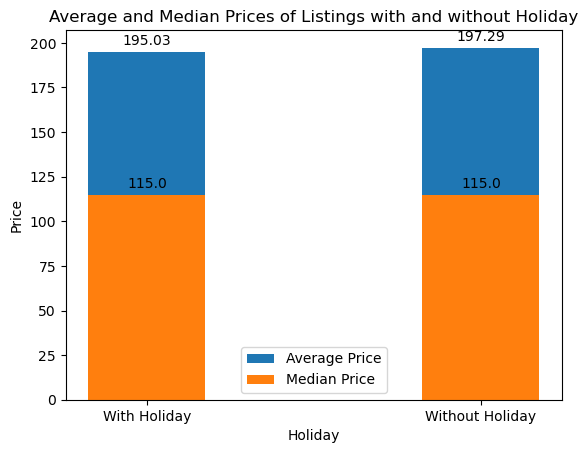

In [7]:
import matplotlib.pyplot as plt

# Calculate average and median prices for listings with and without holidays
average_price_with_holiday = prices_holiday.mean()
median_price_with_holiday = prices_holiday.median()

average_price_without_holiday = prices_non_holiday.mean()
median_price_without_holiday = prices_non_holiday.median()

# Create bar plot
labels = ['With Holiday', 'Without Holiday']
average_prices = [average_price_with_holiday, average_price_without_holiday]
median_prices = [median_price_with_holiday, median_price_without_holiday]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x, average_prices, width, label='Average Price')
bar2 = ax.bar(x, median_prices, width, label='Median Price')

ax.set_xlabel('Holiday')
ax.set_ylabel('Price')
ax.set_title('Average and Median Prices of Listings with and without Holiday')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.show()

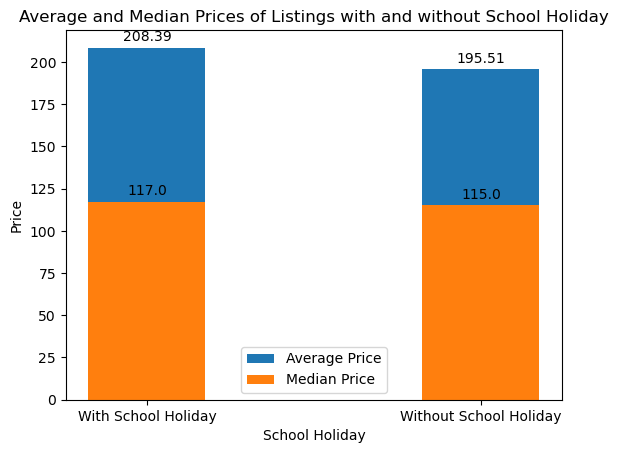

In [8]:
import matplotlib.pyplot as plt

# Calculate average and median prices for listings with and without school holidays
average_price_with_school_holiday = prices_school_holiday.mean()
median_price_with_school_holiday = prices_school_holiday.median()

average_price_without_school_holiday = prices_non_school_holiday.mean()
median_price_without_school_holiday = prices_non_school_holiday.median()

# Create bar plot
labels = ['With School Holiday', 'Without School Holiday']
average_prices = [average_price_with_school_holiday, average_price_without_school_holiday]
median_prices = [median_price_with_school_holiday, median_price_without_school_holiday]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x, average_prices, width, label='Average Price')
bar2 = ax.bar(x, median_prices, width, label='Median Price')

ax.set_xlabel('School Holiday')
ax.set_ylabel('Price')
ax.set_title('Average and Median Prices of Listings with and without School Holiday')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.show()

In [9]:
file_path ='H:/Documents/season.csv'
#file_path = 'C:/Users/Vince Van Ham/OneDrive/Documenten/kuleuven/Thesis/season.csv'
season = pd.read_csv(file_path)

# Convert 'date' columns to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')
season['date'] = pd.to_datetime(season['date'], errors='coerce')

# Remove rows with NaT values in 'date' columns
data = data.dropna(subset=['date'])
season = season.dropna(subset=['date'])

# Merge the dataframes on the 'date' column
merged_data = pd.merge(data, season, on='date', how='left')

# Fill NaN values in the 'season' column with a default value
merged_data['season'].fillna('Unknown', inplace=True)

# Use get_dummies to create columns for each season
season_dummies = pd.get_dummies(merged_data['season'], prefix='season')

# Concatenate the dummies with the original dataframe
merged_data = pd.concat([merged_data, season_dummies], axis=1)

# Drop the 'season' column from the merged dataframe if you no longer need it
merged_data.drop(columns=['season'], inplace=True)

# Save the merged dataframe back to a new CSV file
merged_data.to_csv('airbnb_listings_with_season.csv', index=False)

data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekday,is_holiday,is_school_holiday
0,5396,2023-03-14,f,123.0,123.0,1.0,1125.0,1,0,0
1,5396,2023-03-15,f,123.0,123.0,1.0,1125.0,2,0,0
2,5396,2023-03-16,f,124.0,124.0,1.0,1125.0,3,0,0
3,5396,2023-03-17,f,124.0,124.0,1.0,1125.0,4,0,0
4,5396,2023-03-18,f,124.0,124.0,1.0,1125.0,5,0,0


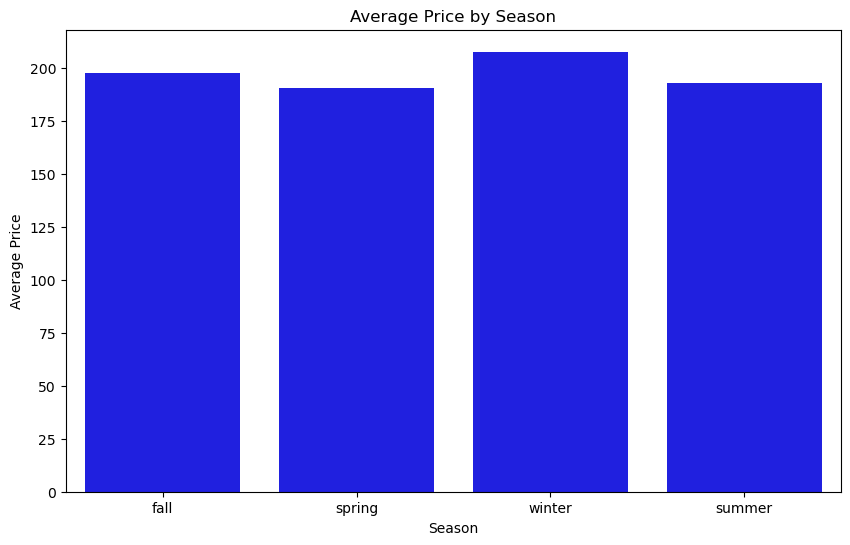

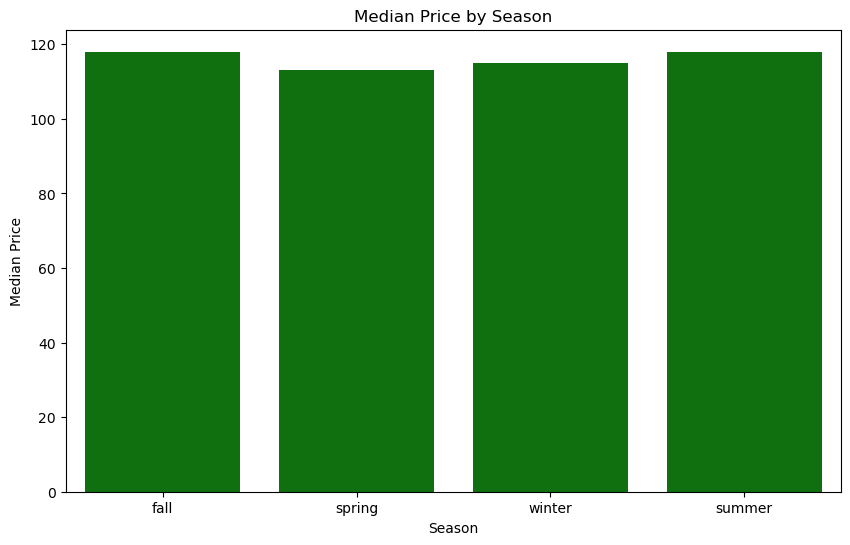

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of seasons for plotting
season_order = ['fall', 'spring', 'winter', 'summer']

# Calculate average and median prices for each season
average_prices = []
median_prices = []

for season in season_order:
    season_column = f'season_{season}'
    season_listings = merged_data[merged_data[season_column] == 1]
    average_price = season_listings['price'].mean()
    median_price = season_listings['price'].median()
    average_prices.append(average_price)
    median_prices.append(median_price)

# Create bar plot for average prices
plt.figure(figsize=(10, 6))
sns.barplot(x=season_order, y=average_prices, color='blue')
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.show()

# Create bar plot for median prices
plt.figure(figsize=(10, 6))
sns.barplot(x=season_order, y=median_prices, color='green')
plt.title('Median Price by Season')
plt.xlabel('Season')
plt.ylabel('Median Price')
plt.show()

In [11]:
from scipy.stats import f_oneway

# Define the seasons and corresponding data
spring_prices = merged_data[merged_data['season_spring'] == 1]['price']
summer_prices = merged_data[merged_data['season_summer'] == 1]['price']
fall_prices = merged_data[merged_data['season_fall'] == 1]['price']
winter_prices = merged_data[merged_data['season_winter'] == 1]['price']

# Perform the ANOVA test
anova_result = f_oneway(spring_prices, summer_prices, fall_prices, winter_prices)

# Print the ANOVA test result
print("ANOVA p-value:", anova_result.pvalue)


ANOVA p-value: 0.0
